In [1]:
import requests
from bs4 import BeautifulSoup

# from google.colab import files

k_enargy_to_fuel = 1/(2*3.6*3.6*32*1000*0.35*0.85)

weight = [33, 13, 33, 13]

url_req = (['?imei=352094089278805&s_dt=2022-08-10%2011:50:00&e_dt=2022-08-10%2012:22:55',
            '?imei=352094089278805&s_dt=2022-08-10%2012:22:55&e_dt=2022-08-10%2012:48:24',
            '?imei=352094089278805&s_dt=2022-08-10%2012:48:24&e_dt=2022-08-10%2013:19:41',
            '?imei=352094089278805&s_dt=2022-08-10%2013:19:41&e_dt=2022-08-10%2013:46:25',
            '?imei=352094089278805&s_dt=2022-08-10%2014:21:59&e_dt=2022-08-10%2014:45:00',
            '?imei=352094089278805&s_dt=2022-08-16%2009:50:00&e_dt=2022-08-16%2013:20:00'])

web_link = 'https://nav.by/info/testAccel.php'

db_files = []

### postman
import requests

url = "https://nav.by/login_get_data.php?type=LOGIN&data%5Blogin%5D=diler_el_vek&data%5Bpwd%5D=111111&data%5BscreenWidth%5D=1920&data%5BscreenHeight%5D=1080"

payload = {}
headers = {
    'Cookie': 'pc_id=60b9bbc0-bef7-4c4b-9052-003672c5d1a9; ses_id=15fb4b00-046b-4e59-bd88-175381dd03b8'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)


### postman

def remove_str(value, deletechars_):
    for c in deletechars_:
        value = value.replace(c, '_')
    return value


NUM_OF_FILES = len(url_req)
for p in range(NUM_OF_FILES):

    name_of_file = remove_str(url_req[p], '\/:*?"<>|&%=-')
    db_files.append(name_of_file)

    print(name_of_file)

    file = open(name_of_file + ".csv", "w")
    file.close()

    response = requests.request("GET", web_link + url_req[p], headers=headers, data=payload)
    soup = BeautifulSoup(response.text, 'lxml')

    file = open(name_of_file + ".csv", "a+")

    quotes = soup.find_all('p')
    for quote in quotes:
        file.write(quote.text)
    file.close()

    file = open(name_of_file + ".csv", "r")
    lines = file.readlines()
    file.close()

    f_first_line = 1

    file = open(name_of_file + ".csv", "w")
    for line in lines:
        if f_first_line == 1:
            file.write(line)
            f_first_line = 0
        if ((
                line != "date;speed;78;64011;64022;64033;64044;delta64011;delta64022;delta64033;delta64044;vodo;lat;lon;dir;alt;engine_speed;distance_gps;201;202;203;204;210;211;212;213;214;215;ain1;ain2\n") and (
                line != "\n")):
            file.write(line)
    file.close()

{"url":".\/info\/help.php","exitCode":0}
_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2012_22_55
_imei_352094089278805_s_dt_2022_08_10_2012_22_55_e_dt_2022_08_10_2012_48_24
_imei_352094089278805_s_dt_2022_08_10_2012_48_24_e_dt_2022_08_10_2013_19_41
_imei_352094089278805_s_dt_2022_08_10_2013_19_41_e_dt_2022_08_10_2013_46_25
_imei_352094089278805_s_dt_2022_08_10_2014_21_59_e_dt_2022_08_10_2014_45_00
_imei_352094089278805_s_dt_2022_08_16_2009_50_00_e_dt_2022_08_16_2013_20_00


In [2]:
import math
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from array import array

sns.set(style="darkgrid")

In [3]:
from scipy.optimize import curve_fit

kfc_init = 0.0, 1.0, 0.0

def func_fuel_consumption(x, k1, k2, k3):
    delta_es_, delta_es_app_, delta_es_app_2_ = x
    return k1 * delta_es_ + k2 * delta_es_app_ + k3 * delta_es_app_2_


len(_imei_352094089278805_s_dt_2022_08_10_2011_50_00_e_dt_2022_08_10_2012_22_55):548
len(_imei_352094089278805_s_dt_2022_08_10_2012_22_55_e_dt_2022_08_10_2012_48_24):538
len(_imei_352094089278805_s_dt_2022_08_10_2012_48_24_e_dt_2022_08_10_2013_19_41):641
len(_imei_352094089278805_s_dt_2022_08_10_2013_19_41_e_dt_2022_08_10_2013_46_25):565
[0.20994908380018673, 0.3596534099751012, 0.4461124727668846, 0.6647737219887956]
[796, 1467, 2282, 2974]
[1110, 1951, 3038, 3919]
[1590, 2561, 4009, 5089]
[ 0.0006272  -0.00065369  0.00026371]
len(_imei_352094089278805_s_dt_2022_08_10_2014_21_59_e_dt_2022_08_10_2014_45_00):487
len(_imei_352094089278805_s_dt_2022_08_16_2009_50_00_e_dt_2022_08_16_2013_20_00):4231


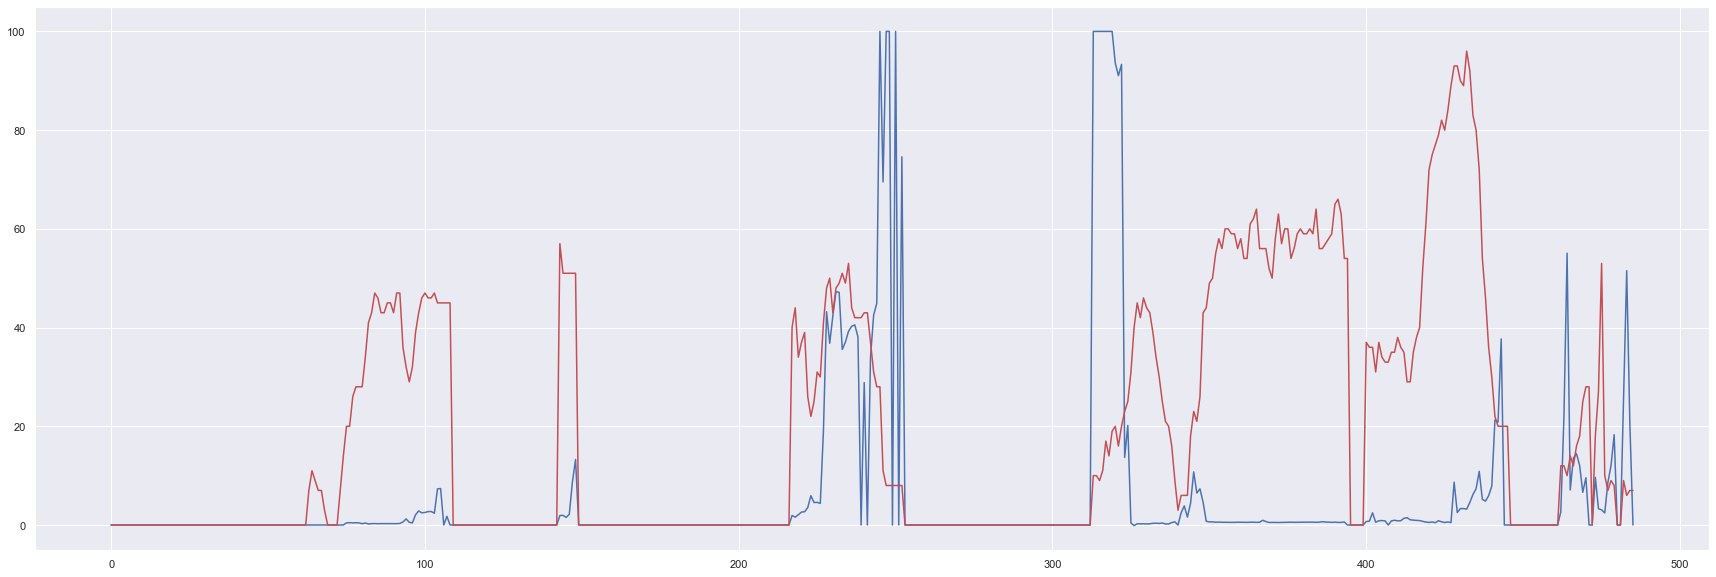

In [29]:
NUM_OF_FILES = len(db_files)

num_points = [0] * NUM_OF_FILES

delta_ES = []
delta_ES_APP = []
delta_ES_2_APP = []
delta_ES_APP_2 = []
delta_ES_2_APP_2 = []
delta_level_dut = []

inst_cons = []
inst_speed = []
inst_acc_plus = []
inst_acc_minus = []

popt_calc_fitting = []

popt_calc_matrix = []
matrix_linear = []

for p in range(NUM_OF_FILES):
    df = pd.read_csv(db_files[p] + '.csv', sep=';', engine='python', decimal=',')
    df.columns = ['date', 'speed', 'rowdata', 'z', 'y', 'x_m', 'x_p', 'delta64011', 'delta64022', 'delta64033',
                  'delta64044', 'vodo', 'lat', 'lon', 'dir', 'alt', 'engine_speed', 'distance_gps', 'sum_ES',
                  'mark_ind1', 'sum_ES_APP', 'mark_ind2', 'sum_ES_2_APP', 'mark_ind3', 'sum_ES_APP_2', 'mark_ind4',
                  'sum_ES_2_APP_2', 'mark_ind5', 'AnIn1', 'AnIn2']

    print('len(' + db_files[p] + '):' + str(len(df)))

    sum_ES_sum = 0
    sum_ES_APP_sum = 0
    sum_ES_2_APP_sum = 0
    sum_ES_APP_2_sum = 0
    sum_ES_2_APP_2_sum = 0
    sum_Energy_sum = 0

    sum_ES_prev = 0
    sum_ES_APP_prev = 0
    sum_ES_2_APP_prev = 0
    sum_ES_APP_2_prev = 0
    sum_ES_2_APP_2_prev = 0
    sum_Speed_prev = 0

    sum_ES_inst = 0
    sum_ES_APP_inst = 0
    sum_ES_2_APP_inst = 0
    sum_ES_APP_2_inst = 0
    sum_ES_2_APP_2_inst = 0
    sum_Energy_inst = 0

    k = 1

    for i in range(1, len(df)):

        if df.speed[i] == df.speed[i] and df.speed[i] > sum_Speed_prev and sum_Speed_prev == sum_Speed_prev and df.delta64044[i] > 1:

            if p <= 3:
                sum_Energy_inst = ((df.speed[i])**2 - sum_Speed_prev**2)*k_enargy_to_fuel*weight[p]
            else:
                sum_Energy_inst = ((df.speed[i])**2 - sum_Speed_prev**2)*k_enargy_to_fuel*15
            sum_Energy_sum += sum_Energy_inst


            if df.sum_ES[i] != 0 and df.sum_ES[i] == df.sum_ES[i] and df.sum_ES[i] > sum_ES_prev:
                if sum_ES_prev != 0:
                    sum_ES_inst = df.sum_ES[i] - sum_ES_prev
                    sum_ES_sum += sum_ES_inst
                sum_ES_prev = df.sum_ES[i]

            if df.sum_ES_APP[i] != 0 and df.sum_ES_APP[i] == df.sum_ES_APP[i] and df.sum_ES_APP[i] > sum_ES_APP_prev:
                if sum_ES_APP_prev != 0:
                    sum_ES_APP_inst = df.sum_ES_APP[i] - sum_ES_APP_prev
                    sum_ES_APP_sum += sum_ES_APP_inst
                sum_ES_APP_prev = df.sum_ES_APP[i]

            if df.sum_ES_2_APP[i] != 0 and df.sum_ES_2_APP[i] == df.sum_ES_2_APP[i] and df.sum_ES_2_APP[
                i] > sum_ES_2_APP_prev:
                if sum_ES_2_APP_prev != 0:
                    sum_ES_2_APP_inst = df.sum_ES_2_APP[i] - sum_ES_2_APP_prev
                    sum_ES_2_APP_sum += sum_ES_2_APP_inst
                sum_ES_2_APP_prev = df.sum_ES_2_APP[i]

            if df.sum_ES_APP_2[i] != 0 and df.sum_ES_APP_2[i] == df.sum_ES_APP_2[i] and df.sum_ES_APP_2[
                i] > sum_ES_APP_2_prev:
                if sum_ES_APP_2_prev != 0:
                    sum_ES_APP_2_inst = df.sum_ES_APP_2[i] - sum_ES_APP_2_prev
                    sum_ES_APP_2_sum += sum_ES_APP_2_inst
                sum_ES_APP_2_prev = df.sum_ES_APP_2[i]

            if df.sum_ES_2_APP_2[i] != 0 and df.sum_ES_2_APP_2[i] == df.sum_ES_2_APP_2[i] and df.sum_ES_2_APP_2[
                i] > sum_ES_2_APP_2_prev:
                if sum_ES_2_APP_2_prev != 0:
                    sum_ES_2_APP_2_inst = df.sum_ES_2_APP_2[i] - sum_ES_2_APP_2_prev
                    sum_ES_2_APP_2_sum += sum_ES_2_APP_2_inst
                sum_ES_2_APP_2_prev = df.sum_ES_2_APP_2[i]

            # if p <= 3:
            #     if len(delta_ES) > 0:
            #         delta_ES.append(sum_ES_sum + delta_ES[-1])
            #         delta_ES_APP.append(sum_ES_APP_sum + delta_ES_APP[-1])
            #         delta_ES_2_APP.append(sum_ES_2_APP_sum + delta_ES_2_APP[-1])
            #         delta_ES_APP_2.append(sum_ES_APP_2_sum + delta_ES_APP_2[-1])
            #         delta_ES_2_APP_2.append(sum_ES_2_APP_2_sum + delta_ES_2_APP_2[-1])
            #         delta_level_dut.append(sum_Energy_sum + delta_level_dut[-1])
            #     else:
            #         delta_ES.append(sum_ES_sum)
            #         delta_ES_APP.append(sum_ES_APP_sum)
            #         delta_ES_2_APP.append(sum_ES_2_APP_sum)
            #         delta_ES_APP_2.append(sum_ES_APP_2_sum)
            #         delta_ES_2_APP_2.append(sum_ES_2_APP_2_sum)
            #         delta_level_dut.append(sum_Energy_sum)

                # delta_ES.append(sum_ES_sum)
                # delta_ES_APP.append(sum_ES_APP_sum)
                # delta_ES_2_APP.append(sum_ES_2_APP_sum)
                # delta_ES_APP_2.append(sum_ES_APP_2_sum)
                # delta_ES_2_APP_2.append(sum_ES_2_APP_2_sum)
                # delta_level_dut.append(sum_Energy_sum)

        sum_Speed_prev = df.speed[i]

        if p == 4:
            if df.distance_gps[i] != 0:
                consap = (10/df.distance_gps[i])*func_fuel_consumption(
                    (sum_ES_inst, sum_ES_APP_inst, sum_ES_APP_2_inst),
                    popt_calc_fitting[0], popt_calc_fitting[1], popt_calc_fitting[2])
            else:
                consap = 0
            if df.speed[i] <= 5:
                consap = 0
            if consap >= 100:
                consap = 100
            if consap <= -10:
                consap = -10
            inst_cons.append(consap)

            inst_speed.append(df.speed[i])
            if df.delta64044[i] < 20 and df.delta64044[i] > 0:
                inst_acc_plus.append(df.delta64044[i] * 10)
            else:
                inst_acc_plus.append(0)

    if len(delta_ES) > 0:
        delta_ES.append(sum_ES_sum + delta_ES[-1])
        delta_ES_APP.append(sum_ES_APP_sum + delta_ES_APP[-1])
        delta_ES_2_APP.append(sum_ES_2_APP_sum + delta_ES_2_APP[-1])
        delta_ES_APP_2.append(sum_ES_APP_2_sum + delta_ES_APP_2[-1])
        delta_ES_2_APP_2.append(sum_ES_2_APP_2_sum + delta_ES_2_APP_2[-1])
        delta_level_dut.append(sum_Energy_sum*0.3 + delta_level_dut[-1])
    else:
        delta_ES.append(sum_ES_sum)
        delta_ES_APP.append(sum_ES_APP_sum)
        delta_ES_2_APP.append(sum_ES_2_APP_sum)
        delta_ES_APP_2.append(sum_ES_APP_2_sum)
        delta_ES_2_APP_2.append(sum_ES_2_APP_2_sum)
        delta_level_dut.append(sum_Energy_sum*0.3)

    if p == 3:
        print(delta_level_dut)
        print(delta_ES)
        print(delta_ES_APP)
        print(delta_ES_APP_2)

        popt, pcov = curve_fit(func_fuel_consumption,
                               (delta_ES, delta_ES_APP, delta_ES_APP_2),
                               delta_level_dut, kfc_init)
        popt_calc_fitting = popt
        print(popt_calc_fitting)

plt.figure(figsize=(30, 10))
plt.plot(inst_cons, 'b')
plt.plot(inst_speed, 'r')
#plt.plot(inst_acc_plus, 'g')
plt.show()
